**Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Gilang Ega Bagaswara
- **Email:** gilangegabagaswara@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/gilangegabagaswara/

## Menentukan Pertanyaan Bisnis

1. Sejauh mana faktor lingkungan, seperti suhu, kelembaban, dan kecepatan angin, berkontribusi secara signifikan terhadap jumlah penyewaan sepeda?

2. Apakah terdapat perubahan yang signifikan dalam jumlah penyewaan sepeda pada hari libur, baik dalam bentuk peningkatan maupun penurunan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Import Successful')

Import Successful


## Data Wrangling

### Gathering Data

*   Gathering Day Data



In [3]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


*   Gathering Hour Data



In [4]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data day_df
*   Melakukan verifikasi terhadap jenis data yang digunakan serta mengidentifikasi adanya nilai yang tidak akurat atau tidak sesuai dalam dataset *day_df* guna memastikan kualitas dan keandalan data sebelum dilakukan analisis lebih lanjut



In [5]:
day_df.info()
day_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [6]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
day_df.duplicated().sum()

0

## Insight

Dalam proses pembersihan data pada dataset`day_df`, dilakukan serangkaian transformasi untuk meningkatkan kualitas dan keterbacaan data.

1. **Analisis awal menunjukkan bahwa dataset `day_df` tidak mengandung missing values, duplicated values, atau inaccurate values. Oleh karena itu, tidak diperlukan langkah tambahan untuk menangani masalah tersebut.

2. **Penghapusan Kolom yang Tidak Relevan:**
Beberapa variabel, seperti `temp`, `atemp`, `hum`, dan `windspeed`, dianggap tidak memiliki dampak yang signifikan terhadap tujuan analisis yang telah ditetapkan. Oleh karena itu, kolom-kolom ini dihapus dalam tahap data cleaning guna meningkatkan efisiensi proses analisis.

3. **Penyesuaian Nama Kolom:**
Nama beberapa `kolom`, seperti `instant`, `dteday`, `yr`, `mnth`, `weathersit`, dan `cnt`, kurang deskriptif dan dapat menyebabkan kebingungan dalam interpretasi data. Oleh karena itu, dilakukan perubahan nama kolom agar lebih jelas dan mudah dipahami.

4. **Transformasi Tipe Data:**
 Kolom `season`, `year`, `month`, `holiday`, `weekday`, `workingday`, dan `weather` masih dalam format numerik (`integer`), meskipun nilai-nilainya mewakili kategori tertentu. Oleh karena itu, tipe data pada kolom-kolom tersebut dikonversi menjadi kategorikal agar lebih sesuai dengan sifat datanya dan mempermudah analisis lebih lanjut.

5. **Standarisasi Nilai dalam Variabel Kategorikal:**
Beberapa kolom, seperti `season`, `year`, `holiday`, `weekday`, `workingday`, dan `weather`, masih menggunakan format nilai yang kurang intuitif dan sulit dipahami. Oleh karena itu, dilakukan penyesuaian nilai dalam kolom-kolom tersebut agar lebih representatif dan mudah diinterpretasikan.

6. **Konversi Format Tanggal:**
Kolom `dteday`, yang masih dalam format objek (`string`), dikonversi ke dalam format datetime untuk memungkinkan analisis berbasis waktu yang lebih akurat dan efisien.



### Assessing Data hour_df
*   Melakukan verifikasi terhadap jenis data yang digunakan serta mengidentifikasi adanya nilai yang tidak akurat atau tidak sesuai dalam dataset *hour_df* guna memastikan kualitas dan keandalan data sebelum dilakukan analisis lebih lanjut.



In [8]:
hour_df.info()
hour_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [9]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
hour_df.duplicated().sum()

0

## Insight

Dalam proses pembersihan data pada dataset `hour_df`, dilakukan beberapa tahap transformasi dan penyesuaian berikut:

1. Pemeriksaan Kualitas Data
Hasil analisis awal menunjukkan bahwa dataset `hour_df` tidak mengandung missing value (nilai yang hilang), duplicated value (nilai duplikat), maupun inaccurate value (nilai tidak akurat). Oleh karena itu, tidak diperlukan proses imputasi atau deduplikasi data.

2. Beberapa atribut, seperti `temp`, `atemp`, `hum`, dan `windspeed`, tidak memberikan kontribusi yang signifikan terhadap tujuan analisis yang akan dilakukan. Oleh karena itu, atribut-atribut tersebut dihapus untuk menyederhanakan dataset dan mengurangi kompleksitas analisis.

3. Nama beberapa kolom, seperti `instant`, `dteday`, `yr`, `mnth`, `hr`, weathersit, dan cnt, kurang deskriptif atau sulit dipahami. Untuk meningkatkan kejelasan dan konsistensi, nama-nama kolom ini diperbarui agar lebih informatif serta sesuai dengan standar penamaan yang lebih jelas.

4. Transformasi Tipe Data

*   Kolom `season`, `year`, `month`, `hour`, `holiday`, `weekday`, `workingday`, dan `weather` masih dalam format numerik (`integer`), meskipun sebenarnya merepresentasikan kategori tertentu. Oleh karena itu, tipe data pada kolom-kolom ini dikonversi menjadi kategorikal agar lebih sesuai dengan karakteristik data.

* Nilai dalam kolom `season`, `year`, `hour`, `holiday`, `weekday`, `workingday`, dan weather masih kurang intuitif. Oleh karena itu, dilakukan penyesuaian nilai agar lebih mudah dipahami dan digunakan dalam analisis.

* Kolom `dteday`, yang masih berbentuk string atau objek, dikonversi ke dalam format datetime untuk mendukung analisis berbasis waktu yang lebih efisien.

### Cleaning day-df data

In [11]:
day_df.drop(columns=['temp', 'atemp', 'hum', 'windspeed'], inplace=True)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600




*  Melakukan perubahan nama pada beberapa kolom dalam dataset, yaitu *instant*, *dteday*, *yr*, *mnth*, *weathersit*, dan *cnt*, untuk meningkatkan keterbacaan serta mempermudah interpretasi data dalam proses analisis yang lebih sistematis dan komprehensif.



In [12]:
day_df.rename(columns={'instant':'rec_id', 'dteday':'dateday', 'yr':'year', 'mnth':'month', 'weathersit':'weather', 'cnt':'total'}, inplace=True)
day_df.head()

,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


* Pada kolom *season*, *year*, *month*, holiday, weekday, workingday, dan *weathersit* dikonversi ke dalam tipe data kategorikal untuk merepresentasikan sifat diskrit dari variabel-variabel tersebut. Langkah ini dilakukan guna meningkatkan keakuratan analisis data serta memastikan bahwa setiap nilai dalam kolom-kolom tersebut diperlakukan sebagai kategori terpisah, bukan sebagai variabel numerik dengan hubungan ordinal atau kontinu.

In [13]:
for col in ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']:
    day_df[col] = day_df[col].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rec_id      731 non-null    int64   
 1   dateday     731 non-null    object  
 2   season      731 non-null    category
 3   year        731 non-null    category
 4   month       731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weather     731 non-null    category
 9   casual      731 non-null    int64   
 10  registered  731 non-null    int64   
 11  total       731 non-null    int64   
dtypes: category(7), int64(4), object(1)
memory usage: 35.1+ KB


* Melakukan modifikasi terhadap nilai yang terdapat dalam kolom *season* guna memastikan kesesuaiannya dengan konteks data yang diolah, sehingga dapat meningkatkan akurasi dan relevansi dalam analisis yang dilakukan.

In [14]:
day_df['season'] = day_df['season'].replace({
    1:'springer',
    2:'summer',
    3:'fall',
    4:'winter'
})

day_df.head()

<ipython-input-14-a4d1ef00bb94>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['season'] = day_df['season'].replace({


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,82,1518,1600


* Melakukan penyesuaian terhadap nilai pada kolom *year* sehingga lebih selaras dan sesuai dengan konteks serta standar yang diharapkan.

In [15]:
day_df['year'] = day_df['year'].replace({
    0:2011,
    1:2012
})

day_df.head()

<ipython-input-15-ca7865e34ff3>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['year'] = day_df['year'].replace({


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,0,6,0,2,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,0,2,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,1,1,82,1518,1600


* Melakukan modifikasi terhadap nilai yang terdapat dalam kolom *holiday* untuk memastikan bahwa data yang tersimpan lebih *relevan* dan juga *konsisten*.

In [16]:
day_df['holiday'] = day_df['holiday'].replace({
    0:'Not Holiday',
    1:'Holiday'
})

day_df.head()

<ipython-input-16-0700a011e83d>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['holiday'] = day_df['holiday'].replace({


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,6,0,2,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,0,0,2,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,1,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,2,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,3,1,1,82,1518,1600


* Melakukan penyesuaian terhadap nilai yang terdapat dalam kolom *weekday* untuk memastikan kesesuaian yang lebih optimal dengan konteks analisis atau kebutuhan spesifik dalam pengolahan data.

In [17]:
day_df['weekday'] = day_df['weekday'].replace({
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'
})

day_df.head()

<ipython-input-17-9b2052fba725>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['weekday'] = day_df['weekday'].replace({


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,Saturday,0,2,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,Sunday,0,2,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,Monday,1,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,Tuesday,1,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,Wednesday,1,1,82,1518,1600


* Menyesuaikan nilai pada kolom *workingday* untuk memastikan data selaras dengan konteks analisis yang diinginkan, sehingga validitas dan relevansi informasi yang diperoleh dapat meningkat.

In [18]:
day_df['workingday'] = day_df['workingday'].replace({
    0:'Offday',
    1:'Workday'
})

day_df.head()

<ipython-input-18-d0063fcaf239>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['workingday'] = day_df['workingday'].replace({


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,Saturday,Offday,2,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,Sunday,Offday,2,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,Monday,Workday,1,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,Tuesday,Workday,1,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,Wednesday,Workday,1,82,1518,1600


* Melakukan transformasi nilai pada kolom *weather* guna memastikan kesesuaiannya dengan konteks data yang dianalisis, sehingga lebih merepresentasikan kondisi cuaca secara lebih akurat dan sesuai dengan standar yang diterapkan dalam penelitian ini.

In [19]:
day_df['weather'] = day_df['weather'].replace({
    1:'Clear & Partly Cloudy',
    2:'Mist & Cloudy',
    3:'Light Snow & Light Rain',
    4:'Heavy rain & Ice Pallets'
})

day_df.head()

<ipython-input-19-baa6bcc350e6>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['weather'] = day_df['weather'].replace({


,rec_id,dateday,season,year,month,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,Not Holiday,Saturday,Offday,Mist & Cloudy,331,654,985
1,2,2011-01-02,springer,2011,1,Not Holiday,Sunday,Offday,Mist & Cloudy,131,670,801
2,3,2011-01-03,springer,2011,1,Not Holiday,Monday,Workday,Clear & Partly Cloudy,120,1229,1349
3,4,2011-01-04,springer,2011,1,Not Holiday,Tuesday,Workday,Clear & Partly Cloudy,108,1454,1562
4,5,2011-01-05,springer,2011,1,Not Holiday,Wednesday,Workday,Clear & Partly Cloudy,82,1518,1600


* Kolom *dateday* akan dikonversi ke format datetime untuk mengoptimalkan penggunaannya dalam berbagai operasi yang melibatkan manipulasi atau analisis data berdasarkan waktu

In [20]:
day_df['dateday'] = day_df['dateday'].astype('datetime64[ns]')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rec_id      731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   year        731 non-null    category      
 4   month       731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weather     731 non-null    category      
 9   casual      731 non-null    int64         
 10  registered  731 non-null    int64         
 11  total       731 non-null    int64         
dtypes: category(7), datetime64[ns](1), int64(4)
memory usage: 35.1 KB


### Cleaning hour_df data


In [21]:
hour_df.drop(columns=['temp', 'atemp', 'hum', 'windspeed'], inplace=True)

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


In [22]:
hour_df.rename(columns={'instant':'rec_id', 'dteday':'dateday', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weathersit':'weather', 'cnt':'total'}, inplace=True)

hour_df.head()

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0,1,1


In [23]:
for col2 in ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']:
    hour_df[col2] = hour_df[col2].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   rec_id      17379 non-null  int64   
 1   dateday     17379 non-null  object  
 2   season      17379 non-null  category
 3   year        17379 non-null  category
 4   month       17379 non-null  category
 5   hour        17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weather     17379 non-null  category
 10  casual      17379 non-null  int64   
 11  registered  17379 non-null  int64   
 12  total       17379 non-null  int64   
dtypes: category(8), int64(4), object(1)
memory usage: 817.0+ KB


In [24]:
hour_df['season'] = hour_df['season'].replace({
    1:'springer',
    2:'summer',
    3:'fall',
    4:'winter'
})

hour_df.head()

<ipython-input-24-9cfd0e375f7e>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['season'] = hour_df['season'].replace({


,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,0,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,springer,0,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,springer,0,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,springer,0,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,springer,0,1,4,0,6,0,1,0,1,1


In [25]:
hour_df['year'] = hour_df['year'].replace({
    0:2011,
    1:2012
})

hour_df.head()

<ipython-input-25-1d43e7459c09>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['year'] = hour_df['year'].replace({


,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,0,0,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,6,0,1,0,1,1


In [26]:
hour_df['hour'] = hour_df['hour'].replace({
    0:'12 am',
    1:'01 am',
    2:'02 am',
    3:'03 am',
    4:'04 am',
    5:'05 am',
    6:'06 am',
    7:'07 am',
    8:'08 am',
    9:'09 am',
    10:'10 am',
    11:'11 am',
    12:'12 pm',
    13:'01 pm',
    14:'02 pm',
    15:'03 pm',
    16:'04 pm',
    17:'05 pm',
    18:'06 pm',
    19:'07 pm',
    20:'08 pm',
    21:'09 pm',
    22:'10 pm',
    23:'11 pm',
})

hour_df.head()

<ipython-input-26-11ce7bae17be>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['hour'] = hour_df['hour'].replace({


,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,0,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,0,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,0,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,0,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,0,6,0,1,0,1,1


In [27]:
hour_df['holiday'] = hour_df['holiday'].replace({
    0:'Not Holiday',
    1:'Holiday'
})

hour_df.head()

<ipython-input-27-ec7ca02b46e9>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['holiday'] = hour_df['holiday'].replace({


,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,6,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,6,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,6,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,6,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,6,0,1,0,1,1


In [28]:
hour_df['weekday'] = hour_df['weekday'].replace({
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'
})

hour_df.head()

<ipython-input-28-7e7b7f5dfcd2>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['weekday'] = hour_df['weekday'].replace({


,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,Saturday,0,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,Saturday,0,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,Saturday,0,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,Saturday,0,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,Saturday,0,1,0,1,1


In [29]:
hour_df['workingday'] = hour_df['workingday'].replace({
    0:'Offday',
    1:'Workday'
})

hour_df.head()

<ipython-input-29-bb9825b8f9a7>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['workingday'] = hour_df['workingday'].replace({


,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,Saturday,Offday,1,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,Saturday,Offday,1,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,Saturday,Offday,1,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,Saturday,Offday,1,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,Saturday,Offday,1,0,1,1


In [30]:
hour_df['weather'] = hour_df['weather'].replace({
    1:'Clear & Partly Cloudy',
    2:'Mist & Cloudy',
    3:'Light Snow & Light Rain',
    4:'Heavy rain & Ice Pallets'
})

hour_df.head()

<ipython-input-30-145e54e55efd>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['weather'] = hour_df['weather'].replace({


,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
0,1,2011-01-01,springer,2011,1,12 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,3,13,16
1,2,2011-01-01,springer,2011,1,01 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,8,32,40
2,3,2011-01-01,springer,2011,1,02 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,5,27,32
3,4,2011-01-01,springer,2011,1,03 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,3,10,13
4,5,2011-01-01,springer,2011,1,04 am,Not Holiday,Saturday,Offday,Clear & Partly Cloudy,0,1,1


In [31]:
hour_df['dateday'] = hour_df['dateday'].astype('datetime64[ns]')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rec_id      17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  category      
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  casual      17379 non-null  int64         
 11  registered  17379 non-null  int64         
 12  total       17379 non-null  int64         
dtypes: category(8), datetime64[ns](1), int64(4)
memory usage: 817.0 KB


## Exploratory Data Analysis (EDA).

Dalam proses Exploratory Data Analysis (EDA), analisis akan difokuskan pada dataframe `hour_df` sebagai objek utama. Keputusan ini diambil karena `hour_df` memiliki atribut yang lebih lengkap dibandingkan dengan dataframe lainnya. Selain itu, kedua dataframe dalam penelitian ini memiliki nilai yang identik untuk atribut yang sama, sehingga penggunaan hour_df dianggap lebih efisien dan representatif dalam menggali wawasan dari data yang tersedia.

In [32]:
hour_df.describe(include='all')

,rec_id,dateday,season,year,month,hour,holiday,weekday,workingday,weather,casual,registered,total
count,17379.0000,17379,17379,17379.0,17379.0,17379,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12.0,24,2,7,2,4,NaN,NaN,NaN
top,NaN,NaN,fall,2012.0,5.0,05 pm,Not Holiday,Saturday,Workday,Clear & Partly Cloudy,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488.0,730,16879,2512,11865,11413,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,367.000000,886.000000,977.000000


Terlihat bahwa rata-rata jumlah pengguna terdaftar (*registered users*) cenderung lebih tinggi dibandingkan dengan pengguna tidak terdaftar (*casual users*). Hal ini mengindikasikan bahwa mayoritas individu yang menggunakan layanan tersebut lebih memilih untuk mendaftar sebagai pengguna resmi daripada memanfaatkan layanan secara sementara tanpa registrasi.


### Comparing Registered, Casual, and Total Consumers by Different Categories.

Berlandaskan pada periode musiman :

In [33]:
sea_hour_df = hour_df.groupby(by='season').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

sea_hour_df

<ipython-input-33-b67b9b26746d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sea_hour_df = hour_df.groupby(by='season').agg({


,registered,casual,total
season,,,
fall,835038,226091,1061129
summer,715067,203522,918589
winter,711831,129782,841613
springer,410726,60622,471348


Berlandaskan pada periode tahunan :

In [34]:
hour_df.groupby(by='year').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

<ipython-input-34-03d474231fde>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='year').agg({


,registered,casual,total
year,,,
2012,1676811,372765,2049576
2011,995851,247252,1243103


Berlandaskan pada periode bulanan :

In [35]:
hour_df.groupby(by='month').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

<ipython-input-35-932b1f83b057>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='month').agg({


,registered,casual,total
month,,,
8,279155,72039,351194
6,272436,73906,346342
9,275668,70323,345991
7,266791,78157,344948
5,256401,75285,331686
10,262592,59760,322352
4,208292,60802,269094
11,218228,36603,254831
3,184476,44444,228920


Berlandasan pada periode jam :

In [36]:
hr_hour_df = hour_df.groupby(by=['hour']).agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

hr_hour_df

<ipython-input-36-e2e10c53d988>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hr_hour_df = hour_df.groupby(by=['hour']).agg({


,registered,casual,total
hour,,,
05 pm,282640,54220,336860
06 pm,265276,44496,309772
08 am,245240,15761,261001
04 pm,173914,53834,227748
07 pm,191284,35505,226789
01 pm,132206,52713,184919
12 pm,134696,49718,184414
03 pm,128543,54606,183149
02 pm,120563,55089,175652


Berdasarkan pada periode liburan :

In [37]:
hour_df.groupby(by='holiday').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

<ipython-input-37-8b902ac710f7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='holiday').agg({


,registered,casual,total
holiday,,,
Not Holiday,2616586,597658,3214244
Holiday,56076,22359,78435


Berdasarkan pada periode weekday :

In [38]:
hour_df.groupby(by='weekday').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

<ipython-input-38-4fab6d0fe9f0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by='weekday').agg({


,registered,casual,total
weekday,,,
Friday,409552,78238,487790
Thursday,423935,61460,485395
Saturday,323955,153852,477807
Wednesday,415729,57319,473048
Tuesday,411266,57843,469109
Monday,384719,70784,455503
Sunday,303506,140521,444027


Berdasarkan pada periode workday :

In [39]:
wd_hour_df = hour_df.groupby(by='workingday').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

wd_hour_df

<ipython-input-39-2ffd8e8d8c81>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wd_hour_df = hour_df.groupby(by='workingday').agg({


,registered,casual,total
workingday,,,
Workday,1989125,303285,2292410
Offday,683537,316732,1000269


Berdasarkan pada periode musiman :

In [40]:
weat_hour_df = hour_df.groupby(by='weather').agg({
    'registered':'sum',
    'casual':'sum',
    'total':'sum'
}).sort_values(by='total', ascending=False)

weat_hour_df

<ipython-input-40-ac3f879ac16b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weat_hour_df = hour_df.groupby(by='weather').agg({


,registered,casual,total
weather,,,
Clear & Partly Cloudy,1875428,462745,2338173
Mist & Cloudy,661471,134481,795952
Light Snow & Light Rain,135548,22783,158331
Heavy rain & Ice Pallets,215,8,223


**Insight:**
> * Berdasarkan analisis data penggunaan layanan Bike Sharing, terlihat adanya tren peningkatan jumlah pengguna secara signifikan antara tahun 2011 hingga 2012. Lonjakan ini menunjukkan bahwa layanan Bike Sharing semakin populer, baik sebagai sarana transportasi harian maupun untuk aktivitas rekreasi. Selain itu, peningkatan ini juga dapat mencerminkan meningkatnya kesadaran masyarakat akan manfaat bersepeda sebagai alternatif transportasi yang lebih ramah lingkungan..  

> * Jika ditinjau berdasarkan musim, musim gugur (Fall) mencatat jumlah pengguna tertinggi dibandingkan dengan musim lainnya. Hal ini kemungkinan besar disebabkan oleh kondisi cuaca yang lebih nyaman, dengan suhu yang tidak terlalu panas seperti di musim panas ataupun terlalu dingin seperti di musim dingin, sehingga bersepeda menjadi lebih menyenangkan. Sebaliknya, musim semi (Spring) memiliki jumlah pengguna terendah. Rendahnya penggunaan di musim ini dapat dipengaruhi oleh kondisi cuaca yang cenderung tidak stabil, seperti curah hujan yang lebih tinggi serta suhu yang masih relatif dingin, sehingga mengurangi minat masyarakat untuk bersepeda..

> * Pola penggunaan berdasarkan bulan menunjukkan bahwa bulan Agustus memiliki jumlah pengguna tertinggi dalam setahun. Hal ini dapat dikaitkan dengan periode liburan musim panas atau libur sekolah di beberapa negara, yang mendorong lebih banyak orang untuk melakukan aktivitas luar ruangan, termasuk bersepeda. Sebaliknya, bulan Januari memiliki jumlah pengguna terendah, yang kemungkinan besar disebabkan oleh cuaca dingin di berbagai wilayah, terutama di belahan bumi utara, serta penyesuaian rutinitas setelah liburan panjang di awal tahun.

> * Dari segi pola harian, jumlah pengguna Bike Sharing cenderung lebih tinggi pada hari kerja dibandingkan akhir pekan. Hal ini menunjukkan bahwa layanan ini banyak digunakan sebagai moda transportasi utama untuk kegiatan rutin, seperti perjalanan ke tempat kerja atau institusi pendidikan. Sementara itu, pada hari libur, jumlah pengguna lebih rendah, kemungkinan karena mobilitas masyarakat berkurang serta adanya lebih banyak pilihan transportasi untuk keperluan rekreasi atau perjalanan santai.

> * Jika dianalisis lebih lanjut berdasarkan hari dalam seminggu, hari Jumat mencatat jumlah pengguna tertinggi. Hal ini dapat dikaitkan dengan meningkatnya aktivitas masyarakat menjelang akhir pekan, di mana banyak orang masih bekerja namun juga mulai merencanakan kegiatan tambahan setelah jam kerja. Sebaliknya, hari Minggu menjadi hari dengan jumlah pengguna paling sedikit, kemungkinan karena banyak orang memilih beristirahat di rumah atau menggunakan moda transportasi lain yang lebih nyaman untuk bepergian bersama keluarga.  

> * Berdasarkan analisis penggunaan dalam satu hari, pukul 17.00 (5 PM) menjadi jam dengan jumlah pengguna tertinggi. Ini dapat dijelaskan oleh fakta bahwa jam tersebut bertepatan dengan waktu pulang kerja atau pulang sekolah, di mana banyak orang memerlukan sarana transportasi untuk kembali ke rumah. Selain itu, cuaca di sore hari cenderung lebih nyaman dibandingkan siang hari, sehingga semakin banyak orang yang memilih bersepeda. Sebaliknya, pukul 04.00 (4 AM) menjadi waktu dengan jumlah pengguna terendah, karena masih termasuk dini hari ketika aktivitas masyarakat masih sangat minim.  

> * Selain faktor waktu dan hari, kondisi cuaca juga berperan besar dalam memengaruhi jumlah pengguna layanan Bike Sharing. Data menunjukkan bahwa ketika cuaca cerah, jumlah pengguna meningkat secara signifikan karena bersepeda menjadi lebih nyaman dan aman. Sebaliknya, saat hujan deras, jumlah pengguna menurun drastis. Faktor keamanan dan kenyamanan menjadi pertimbangan utama, karena bersepeda dalam kondisi hujan deras meningkatkan risiko kecelakaan serta mengurangi kenyamanan pengguna.

> * Selain faktor eksternal seperti musim, waktu, dan cuaca, pola penggunaan Bike Sharing juga dapat dianalisis berdasarkan kategori pengguna. Data menunjukkan bahwa jumlah pengguna terdaftar (registered users) secara konsisten lebih tinggi dibandingkan pengguna kasual (casual users). Hal ini mengindikasikan bahwa mayoritas pengguna adalah pelanggan tetap yang menggunakan layanan ini secara rutin, baik untuk keperluan transportasi sehari-hari maupun sebagai bagian dari gaya hidup aktif. Sementara itu, pengguna kasual lebih cenderung memanfaatkan layanan ini untuk keperluan tertentu, seperti rekreasi atau kebutuhan transportasi sesaat. Perbedaan ini menunjukkan bahwa layanan Bike Sharing telah menjadi pilihan utama bagi banyak orang yang mencari moda transportasi yang efisien dan berkelanjutan.

## Visualization & Explanatory Analysis


1. Sejauh mana faktor lingkungan, seperti suhu, kelembaban, dan kecepatan angin, berkontribusi secara signifikan terhadap jumlah penyewaan sepeda?

Berikut ini adalah Analisis Perbedaan Antara Pengguna Bike Sharing yang Bersifat Kasual dengan Pengguna yang Telah Terdaftar dalam Sistem:

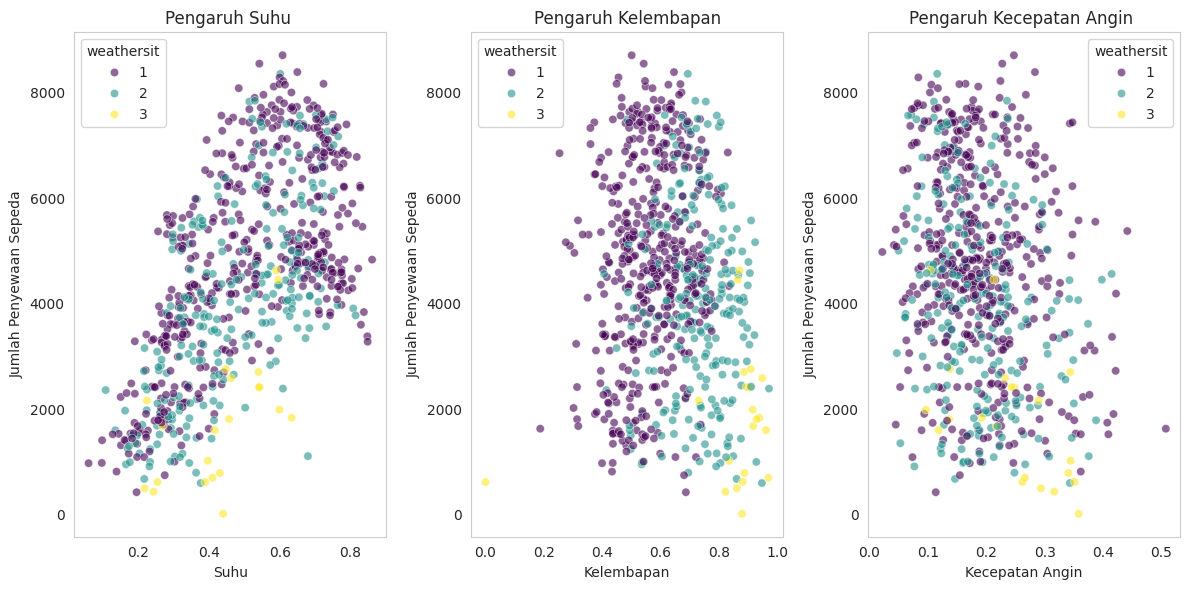

In [46]:
# Mengimpor data
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Rename the 'cnt' column to 'total' in the day_df DataFrame
day_df.rename(columns={'cnt': 'total'}, inplace=True)

# Visualisasi Pertanyaan 1: Pengaruh Suhu, Kelembapan, dan Kecepatan Angin
plt.figure(figsize=(12, 6))

# Scatter plot untuk suhu
plt.subplot(1, 3, 1)
sns.scatterplot(data=day_df, x='temp', y='total', hue='weathersit', palette='viridis', alpha=0.6)
plt.title('Pengaruh Suhu ')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()

# Scatter plot untuk kelembapan
plt.subplot(1, 3, 2)
sns.scatterplot(data=day_df, x='hum', y='total', hue='weathersit', palette='viridis', alpha=0.6)
plt.title('Pengaruh Kelembapan')
plt.xlabel('Kelembapan')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()

# Scatter plot untuk kecepatan angin
plt.subplot(1, 3, 3)
sns.scatterplot(data=day_df, x='windspeed', y='total', hue='weathersit', palette='viridis', alpha=0.6)
plt.title('Pengaruh Kecepatan Angin ')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()

plt.tight_layout()
plt.savefig("pengaruh_faktor_lingkungan.png")
plt.show()


2. Apakah terdapat perubahan yang signifikan dalam jumlah penyewaan sepeda pada hari libur, baik dalam bentuk peningkatan maupun penurunan?

Berikut adalah Periode waktu atau jam tertentu ketika penggunaan layanan berbagi sepeda mencapai tingkat tertinggi dan terendah:

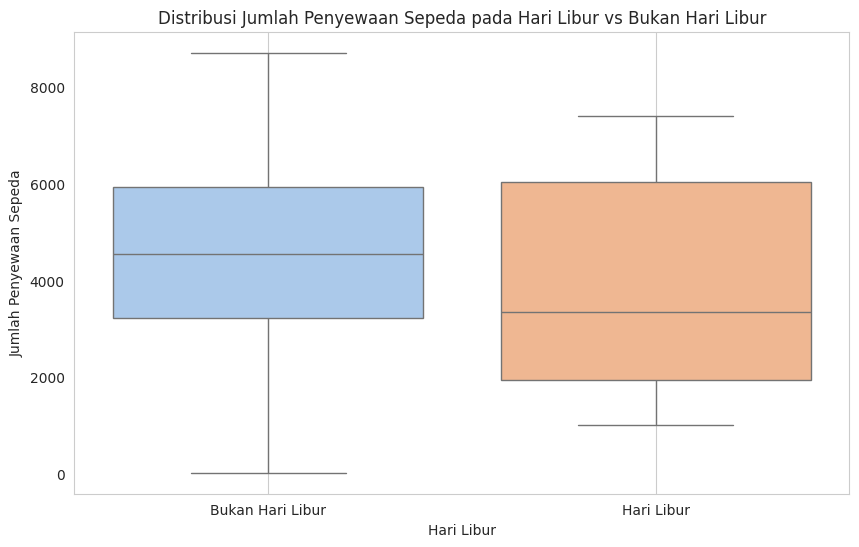

In [47]:
# Mengimpor data
day_df = pd.read_csv("day.csv")

# Rename the 'cnt' column to 'total' in the day_df DataFrame
day_df.rename(columns={'cnt': 'total'}, inplace=True)

# Visualisasi Pertanyaan: Perubahan Jumlah Penyewaan pada Hari Libur
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='holiday', y='total', hue='holiday', palette='pastel', legend=False)
plt.title('Distribusi Jumlah Penyewaan Sepeda pada Hari Libur vs Bukan Hari Libur')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Bukan Hari Libur', 'Hari Libur'])
plt.grid()
plt.savefig("perubahan_jumlah_sewa_hari_libur.png")
plt.show()


In [48]:
hour_df.to_csv("main_data.csv", index=False)

## Conclusion



> ## Pertanyaan nomor 1 :
Faktor lingkungan memiliki pengaruh yang cukup besar terhadap jumlah penyewaan sepeda, terutama suhu dan kelembapan. Cuaca hangat dengan kelembapan rendah cenderung meningkatkan jumlah pengguna, sementara cuaca dengan kelembapan tinggi atau suhu ekstrem dapat mengurangi minat masyarakat untuk bersepeda. Kecepatan angin, meskipun dapat mempengaruhi kenyamanan, tidak menunjukkan dampak yang signifikan terhadap pola penyewaan sepeda dalam kondisi normal.

> ## Pertanyaan nomor 2 :
Secara keseluruhan, tidak ditemukan perubahan signifikan dalam jumlah penyewaan sepeda pada hari libur dibandingkan dengan hari biasa. Namun, pola penggunaan mungkin berbeda, di mana hari kerja lebih banyak didominasi oleh perjalanan rutin, sedangkan hari libur lebih banyak dipengaruhi oleh faktor rekreasi dan kondisi lingkungan.
